# Welcome to Python for Data Science!
Today we'll explore the world of Pandas. We will be using a timeseries dataset from the UCI Machine Learning repository to learn to how to wrangle data and perform analysis. In the second half of the day you'll do some feature engineering and finally there will be room to build a small model to actually put your features to use!

<img src="https://miro.medium.com/max/1400/1*1oVjIRY3Bnmbw-idCtg4BQ@2x.jpeg" style="width: 60%;"/>

## In this part we'll cover the following topics:
- Data ingestion
- Data cleaning
- Data exploration (specifically timeseries) 
- Storing your data (you'll need it in the next part).

---

## Downloading data from UCI
Use the extract method that is applicable for you. If you have any issues with these steps, please ask for help.

In [ ]:
! mkdir -p data && curl -L https://github.com/JelmerOffenberg/datamind-python/blob/master/data/dataset.zip?raw=true --output ./data/dataset.zip && unzip ./data/dataset.zip -d ./data && mv -f ./data/household_power_consumption.txt ./data/household_power_consumption.csv 

## Getting started
First things first, import the following libraries: `pandas`, `matplotlib` and `numpy`

In [1]:
# Your solution
import pandas as pd
import matplotlib
import numpy

In [41]:
%matplotlib inline

---

# Ingestion
The first step in the data science process is data collection. In this section we'll load in some data. Information about the dataset that we'll be loading is located [here](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption). 

**Exercise:**
* Load the power consumption dataset from the data folder
* Inspect the top 5 rows
* Check the data types of the dataframe and answer the following questions:
    * What's wrong with the data types in the info panel?
    * What data types would you expect for each column?
    * Does it make sense to have date and time columns separated?
    

In [22]:
# Start with a simple load

# df = pd.read_csv("../data/household_power_consumption.csv")

# After discovering the separator your load function should look like this:
# Load data properly

# df = pd.read_csv("../data/household_power_consumption.csv", sep=";")


# After completing data cleaning, your load function should look like this:
# It seems that there are missing values annotated with '?' in the data, causing the column to be of object type (string). Let's load the dataset with marking '?' as NaN values
df = pd.read_csv("../data/household_power_consumption.csv", sep=";", na_values="?")

In [5]:
df.head(5)

,Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
0,16/12/2006;17:24:00;4.216;0.418;234.840;18.400...
1,16/12/2006;17:25:00;5.360;0.436;233.630;23.000...
2,16/12/2006;17:26:00;5.374;0.498;233.290;23.000...
3,16/12/2006;17:27:00;5.388;0.502;233.740;23.000...
4,16/12/2006;17:28:00;3.666;0.528;235.680;15.800...


In [6]:
df.dtypes

Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3    object
dtype: object

In [8]:
# Load data properly
df = pd.read_csv("../data/household_power_consumption.csv", sep=";")
df.head()

/var/folders/nn/sc3c7qzd06g1w5b6mz4ff9sh0000gn/T/ipykernel_26215/3103214229.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/household_power_consumption.csv", sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB




### Answers to the Ingestion questions:
- Columns have mixed data types, that's why you see object (string) everywhere.
- All power related columns should be float or int, date should be datetime, and time should be datetime.
- The separation of date and time columns could have its reasons, but merging them would make things much easier.

---

# Data cleaning
In this section you're going to do some data cleaning. Since this is a timeseries dataset, you'll need to make it more usable before we can continue.
- Add date and time columns together and make a single datetime variable. Verify that your new column has the right data type and is correct. The result should be a datetime64\[ns\] object.
- Remove the date and time column from the dataset. 
- Have a look at our variable of interest; `Global_active_power`
    - What data type was assigned by pandas to this variable? Does this make sense?
    - Try casing the variable to the right data type, what do you see?
    - Can you explain this behaviour?
    - Fix the way you load data and rerun your code
    - What change occurred with the data types?
- If you read the dataset description in the previous step, it seems that we can construct a column with the **total energy consumption per minute in watt-hour** on the columns that are available. Do this and name this column `power`. 

    

In [23]:
# add date and time
df["datetime"] = df["Date"] + " " + df["Time"]  # This creates a new string column

df["datetime"]  = pd.to_datetime(df["datetime"])

/var/folders/nn/sc3c7qzd06g1w5b6mz4ff9sh0000gn/T/ipykernel_26215/2095457291.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["datetime"]  = pd.to_datetime(df["datetime"])


In [24]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
datetime                 datetime64[ns]
dtype: object

In [25]:
# Remove date and time columns since we now have datetime
df.drop(["Date", "Time"], axis=1, inplace=True)

In [16]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime'],
      dtype='object')

In [18]:
# Let's fix the Global Active Power
df["Global_active_power"].astype(float)

# It seems that there are missing values annotated with '?' in the data, causing the column to be of object type (string). Let's load the dataset with marking '?' as NaN values, update the read_csv function in the first cell

ValueError: could not convert string to float: '?'

In [26]:
df = df.assign(
    power = lambda x: x.Global_active_power * 1000 / 60 - x.Sub_metering_1 - x.Sub_metering_2 - x.Sub_metering_3
)

In [27]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,power
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,43.100000


---

## Missing values
Find out if there are weird of missing values in the data. Try to identify the rows and columns and answer the following questions.
- are there any missing values in the data set?
- if so, which column(s) contain missing values?
- if there are any missing values, extract the rows and the number of rows that contain missing values
- What would be a good way to deal with the missing values?
- Use your prefered approach to deal with the missing values. Validate if there are any missing values left in your data 

In [28]:
df.isna().any()

# It seems that there are missing values in all columns except the datetime

Global_active_power       True
Global_reactive_power     True
Voltage                   True
Global_intensity          True
Sub_metering_1            True
Sub_metering_2            True
Sub_metering_3            True
datetime                 False
power                     True
dtype: bool

In [30]:
df[df.isna().any(axis=1)]

# The isna().any() function can be used as a filter

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,power
6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:23:00,NaN
6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-21 11:24:00,NaN
19724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:08:00,NaN
19725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-30 10:09:00,NaN
41832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-01-14 18:36:00,NaN
...,...,...,...,...,...,...,...,...,...
1990185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:09:00,NaN
1990186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:10:00,NaN
1990187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:11:00,NaN
1990188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-09-28 19:12:00,NaN


In [32]:
# Since all these values are on a very low timeframe (minutes) and we have a lot of data, we can choose to simply drop the data.
df.dropna(how="any", inplace=True)

In [34]:
df.isna().any()

Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3           False
datetime                 False
power                    False
dtype: bool

In [35]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,power
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,43.100000
...,...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,15.766667
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,15.733333
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,15.633333
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,15.566667


---

# Creating a timeseries
In this section we'll combine some data wrangling with data exploration. 
- The data contains a timeseries, however the current index of the dataframe does not really show this. Change the index to our newly created datetime column so that we end up with a datetime index.

In [36]:
df = df.set_index("datetime")

In [39]:
df.index

DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 20:56:00',
               '2010-11-26 20:57:00', '2010-11-26 20:58:00',
               '2010-11-26 20:59:00', '2010-11-26 21:00:00',
               '2010-11-26 21:01:00', '2010-11-26 21:02:00'],
              dtype='datetime64[ns]', name='datetime', length=2049280, freq=None)

## Plotting
- Having a dataframe with a timeseries index allows us to some funky tricks 
    - Plot the `power` column, is this useful?
    - Create the same plot on the following aggregation levels:
        - Mean per year
        - Mean per 3 months
        - Mean per week
        - Mean per week and median per week
    - Explore the use of `transform` on resampled data. What is the difference with running a normal aggregation function such as `.mean()` on resampled data? Show the differences below.
    - When would you `transform`?    

<Axes: xlabel='datetime'>

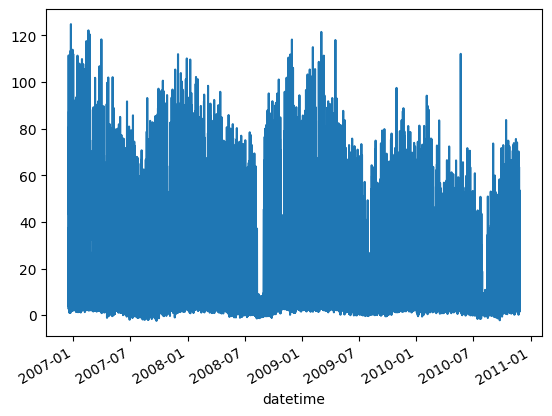

In [40]:
df["power"].plot()

# This plot is not super useful, it shows seasonality and some gaps

<Axes: xlabel='datetime'>

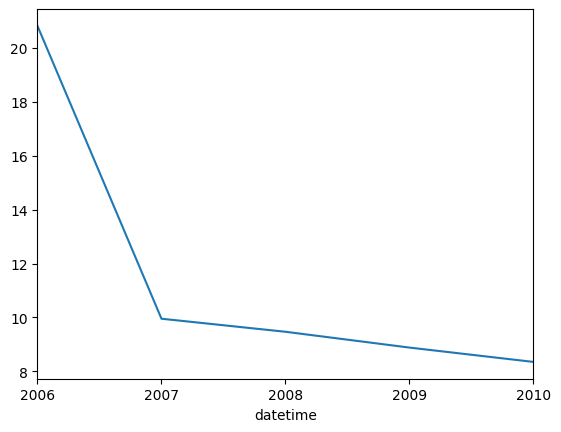

In [44]:
df["power"].resample("1YE").mean().plot()

<Axes: xlabel='datetime'>

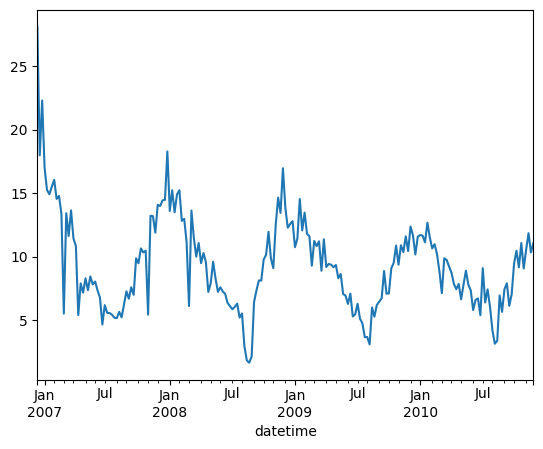

In [45]:
df["power"].resample("1W").mean().plot()

<Axes: xlabel='datetime'>

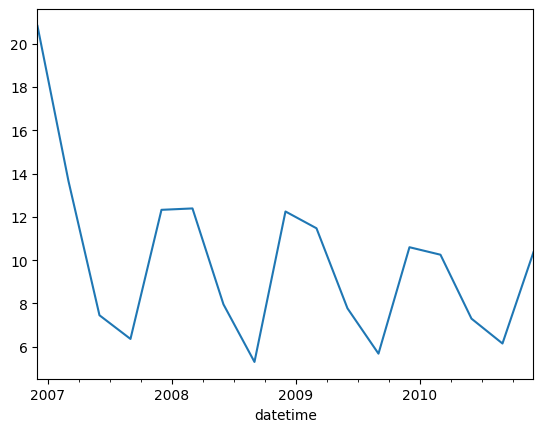

In [48]:
df["power"].resample("3ME").mean().plot()

<Axes: xlabel='datetime'>

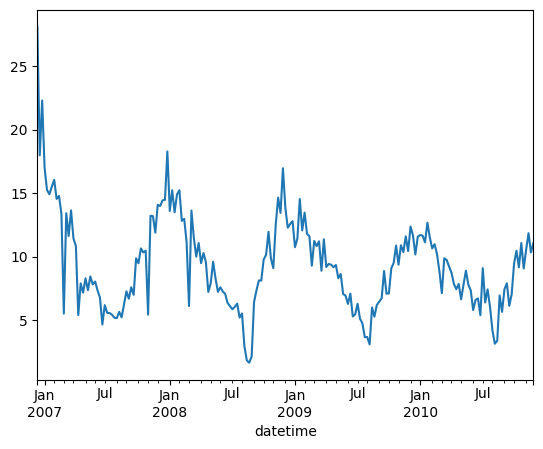

In [50]:
df["power"].resample("1W").agg("mean", "median").plot()

## Creating helper functions
Instead of changing our code every time, we can create a function that will return the plot(s) that we need. In addtion, creating a function allows you to test your code which a good software engineering practice. For more information on functions, see this [link](https://www.tutorialspoint.com/python/python_functions.htm). Write a function that can do the following:
- The function can take in a dataframe, one or more column names, the aggregation level and one or more aggregation metrics (for instance mean or sum). 
- The function should output the graph

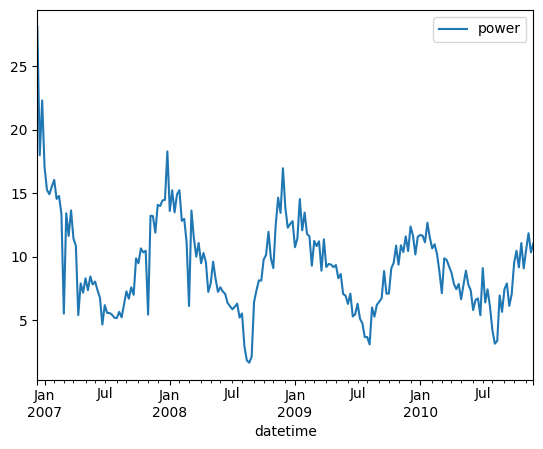

In [52]:
def plot_aggregated_data(df, aggregation_level, columns, aggregation_metrics):
    df.resample(aggregation_level)[columns].agg(*aggregation_metrics).plot()

plot_aggregated_data(df, "1W", ["power"], ["mean", "median"])

---

# Assignment 1:
Now that you've seen how to wrangle the data and create some plots, it's time to find the answer to the following questions:
- Q1: Find the month with the most power consumption
- Q2: Find the top three weeks with the most power consumption
- Q3: What week had the largest difference between what was consumed at the most and the least? 
- Q4: What was the average power consumption on the weekends?
        

In [55]:
# Q1: Use idxmax (index where value is max) to obtain the month
df["power"].resample("1ME").max().idxmax()

Timestamp('2006-12-31 00:00:00')

In [56]:
# Q2:
df["power"].resample("1W").max().nlargest(3)

datetime
2006-12-24    124.833333
2007-02-18    122.166667
2009-03-08    121.500000
Name: power, dtype: float64

In [57]:
# Q3:
result = df["power"].resample("1W").max() - df["power"].resample("1W").min()
result.nlargest(1)

datetime
2006-12-24    123.8
Freq: W-SUN, Name: power, dtype: float64

In [58]:
# You can obtain the actual week by changing the index to a period

df_index_week = df.set_index(df.index.to_period("W"))

(df_index_week["power"].resample("1W").max() - df_index_week["power"].resample("1W").min()).nlargest(1)


/var/folders/nn/sc3c7qzd06g1w5b6mz4ff9sh0000gn/T/ipykernel_26215/3575247062.py:5: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  (df_index_week["power"].resample("1W").max() - df_index_week["power"].resample("1W").min()).nlargest(1)


datetime
2006-12-18/2006-12-24    123.8
Freq: W-SUN, Name: power, dtype: float64

---

# Storage
In this last step, you're going to store the result of your dataset in `parquet` format. 
- What does this format do? What is the benefit of using this?
- You'll need the data in the next exercise so make sure to store it on **day** level. 

In [ ]:
!pip install fastparquet

In [ ]:
df[["power"]].to_parquet('data/ex_1.parquet')

---